In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# Load the dataset
file_path = "/mnt/data/diamond.csv"
data = pd.read_csv('diamond.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Display dataset info
print("\nDataset Info:")
display(data.info())

# Display statistical summary
print("\nStatistical Summary of Numerical Features:")
display(data.describe())


First 5 rows of the dataset:


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


None


Statistical Summary of Numerical Features:


,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [16]:
# Remove duplicates
data_cleaned = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data_cleaned)}")

# Encode categorical variables
categorical_columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

print("\nDataset after encoding categorical variables:")
display(data_cleaned.head())


Number of rows after removing duplicates: 5917

Dataset after encoding categorical variables:


<ipython-input-16-2b767412ec5f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])
<ipython-input-16-2b767412ec5f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])
<ipython-input-16-2b767412ec5f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1,5169
1,0.83,2,4,3,2,2,0,3470
2,0.85,2,4,2,0,0,1,3183
3,0.91,2,1,2,3,3,1,4370
4,0.83,2,3,2,0,0,1,3171


In [17]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = ['Carat Weight', 'Price']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

print("\nDataset after normalization:")
display(data_cleaned.head())



Dataset after normalization:


<ipython-input-17-015ecd770bc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0.162037,2,4,2,3,0,1,0.030037
1,0.037037,2,4,3,2,2,0,0.012941
2,0.046296,2,4,2,0,0,1,0.010053
3,0.074074,2,1,2,3,3,1,0.021997
4,0.037037,2,3,2,0,0,1,0.009932


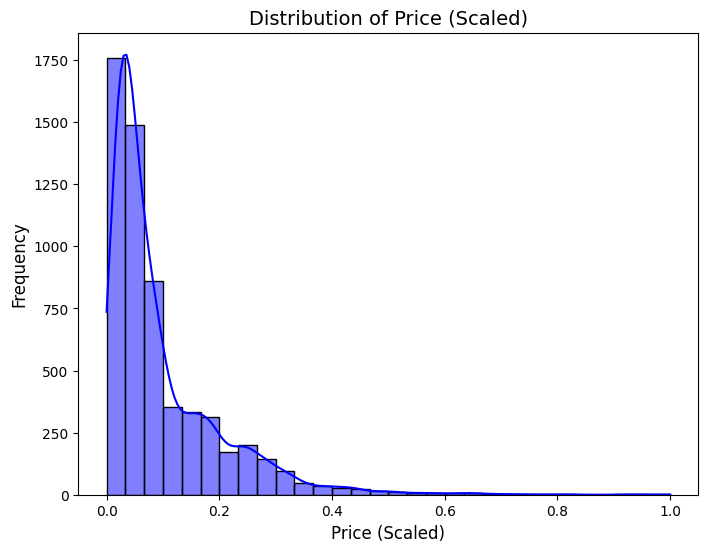

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Price (Scaled)', fontsize=14)
plt.xlabel('Price (Scaled)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


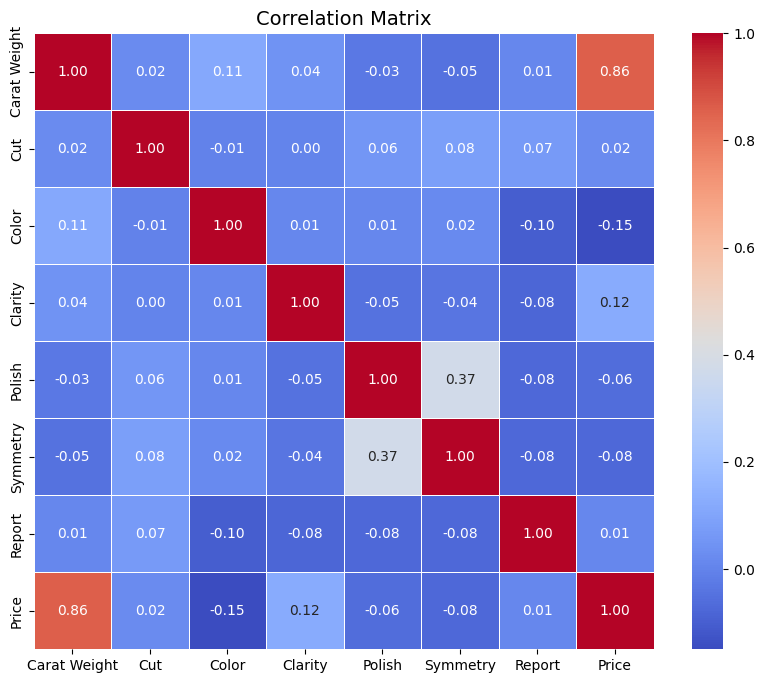

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [20]:
# Separate features and target
X = data_cleaned.drop(columns=['Price'])  # Features
y = data_cleaned['Price']  # Target (continuous)

# Apply f_regression for feature selection
f_reg_selector = SelectKBest(score_func=f_regression, k=5)
X_selected = f_reg_selector.fit_transform(X, y)

# Print selected features
selected_features = X.columns[f_reg_selector.get_support()]
print("\nSelected Features using f_regression:")
for feature, score in zip(selected_features, f_reg_selector.scores_):
    print(f"{feature}: {score}")



Selected Features using f_regression:
Carat Weight: 16505.511306243057
Color: 3.2881574346655844
Clarity: 135.6319357525971
Polish: 87.88507754376182
Symmetry: 22.663599450073715


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (4733, 5), Testing data shape: (1184, 5)


In [22]:
# Train AdaBoost Regressor with Decision Tree as base model
boosting_model = AdaBoostRegressor(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_model.predict(X_test)

# Evaluate Boosting Regressor
boosting_mae = mean_absolute_error(y_test, y_pred_boosting)
boosting_mse = mean_squared_error(y_test, y_pred_boosting)
boosting_r2 = r2_score(y_test, y_pred_boosting)

print("\nBoosting Regressor (AdaBoost) Performance:")
print(f"Mean Absolute Error: {boosting_mae}")
print(f"Mean Squared Error: {boosting_mse}")
print(f"R² Score: {boosting_r2}")



Boosting Regressor (AdaBoost) Performance:
Mean Absolute Error: 0.043268232687337344
Mean Squared Error: 0.0024947526063665753
R² Score: 0.7850056695189063


In [24]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor Performance:")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"Mean Squared Error: {xgb_mse}")
print(f"R² Score: {xgb_r2}")


XGBoost Regressor Performance:
Mean Absolute Error: 0.007343452126183563
Mean Squared Error: 0.0001978038589359401
R² Score: 0.9829535369118438


In [25]:
print("\nFinal Model Performance:")
print(f"Boosting Regressor (AdaBoost):")
print(f"  - Mean Absolute Error: {boosting_mae}")
print(f"  - Mean Squared Error: {boosting_mse}")
print(f"  - R² Score: {boosting_r2}\n")

print(f"XGBoost Regressor:")
print(f"  - Mean Absolute Error: {xgb_mae}")
print(f"  - Mean Squared Error: {xgb_mse}")
print(f"  - R² Score: {xgb_r2}")



Final Model Performance:
Boosting Regressor (AdaBoost):
  - Mean Absolute Error: 0.043268232687337344
  - Mean Squared Error: 0.0024947526063665753
  - R² Score: 0.7850056695189063

XGBoost Regressor:
  - Mean Absolute Error: 0.007343452126183563
  - Mean Squared Error: 0.0001978038589359401
  - R² Score: 0.9829535369118438
